In [ ]:
# import zipped data set into a folder called 'data' in colab...
# then unzip. Ensure unzipped folders are in 'data' folder.
!unzip /content/data/nicholas_cage.zip

Archive:  /content/data/nicholas_cage.zip
  inflating: nicholas_cage/Actor Nicolas Cage and son Kal-El Cage visit_yythkg.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage at the 66th Academy Awards_yythk.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage attends the 40th Annual Miami_yy.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage attends the 53rd Annual Golden_y.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage from _The Unbearable Wight Of_yy.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage of _Dream Scenario_ is photograp.jpg  
  inflating: nicholas_cage/Actor Nicolas Cage poses during a photocall for_yyt.jpg  
  inflating: nicholas_cage/Alice Kim Cage and Nicolas Cage attend the B.jpg  
  inflating: nicholas_cage/American actor Nicolas Cage at the _Moonstruck_ Pre.jpg  
  inflating: nicholas_cage/British actor Nicholas Hoult and US actor Nicolas_y.jpg  
  inflating: nicholas_cage/Director John Woo watches as Nicolas Cage aims_yyth.jpg  
  inflating: nicholas_cage/fav

In [ ]:
# import zipped data set into a folder called 'data' in colab...
# then unzip. Ensure unzipped folders are in 'data' folder.
!unzip /content/data/not_nicholas_cage.zip

Archive:  /content/data/not_nicholas_cage.zip
  inflating: not_nicholas_cage/001_21a7d5e6.jpg  
  inflating: not_nicholas_cage/001_9adc92c2.jpg  
  inflating: not_nicholas_cage/001_beebcee2.jpg  
  inflating: not_nicholas_cage/001_d3323f3c.jpg  
  inflating: not_nicholas_cage/001_dfb62d96.jpg  
  inflating: not_nicholas_cage/001_fe3347c0.jpg  
  inflating: not_nicholas_cage/002_078f6fe5.jpg  
  inflating: not_nicholas_cage/002_533748b2.jpg  
  inflating: not_nicholas_cage/002_6e289116.jpg  
  inflating: not_nicholas_cage/002_85eab275.jpg  
  inflating: not_nicholas_cage/002_8f8da10e.jpg  
  inflating: not_nicholas_cage/002_f44b8d45.jpg  
  inflating: not_nicholas_cage/003_57612506.jpg  
  inflating: not_nicholas_cage/003_61dd1e53.jpg  
  inflating: not_nicholas_cage/003_8889ec2c.jpg  
  inflating: not_nicholas_cage/003_936c5a43.jpg  
  inflating: not_nicholas_cage/003_963a3627.jpg  
  inflating: not_nicholas_cage/003_b622e925.jpg  
  inflating: not_nicholas_cage/004_41caa173.jpg  
  in

In [ ]:
# import libraries
import cv2
import tensorflow as tf
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt

Found 631 files belonging to 2 classes.


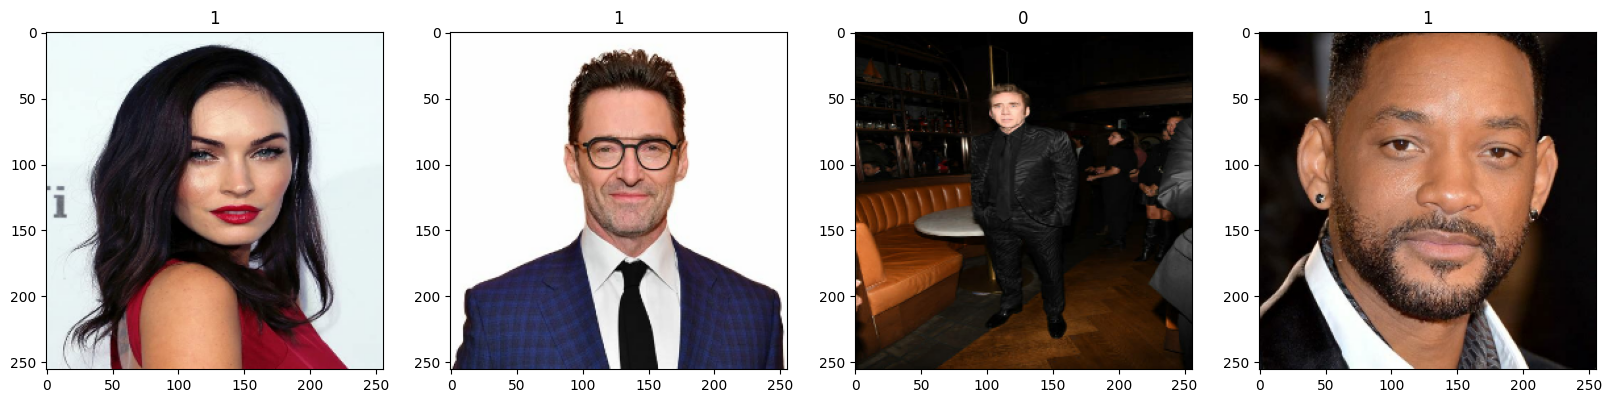

In [ ]:
# load data
data = tf.keras.utils.image_dataset_from_directory('data')

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Scale data and create training and testing partitions
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

train_size = int(len(data)*.7) # training set will be 70% of data
val_size = int(len(data)*.2) # validation set size will be 20% of data
test_size = int(len(data)*.1) # test size will be 10%

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
# build model
from tensorflow.keras.models import Sequential # import sequential API. Sequential is good for 1 data input.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # import needed layers

from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping

model = Sequential() # create a model with sequential class

# Layers are added sequentialy
# 1st layer: convolution has 16 filters ( 3 x 3 pixels inside).
# The power is coming from activation function. Relu is replacing null values.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# 2nd layer - choose maximum value after the relu activation (2 x 2)
model.add(MaxPooling2D())
# 3rd layer, output is only 1 value, use 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
# 4th layer
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# flatten the data again down
model.add(Flatten())
# convolution has 2 Dense layers
model.add(Dense(256, activation='relu')) # output is 256 values
# The final sigmoid layer, close to 0 are mountains, close to 1 is the city
# Sigmoid activation is non-linear, continuously differentiable, monotonic, and has a fixed output range. Main advantage is simple and good for classifier.
# Sigmoid activation gives rise to a problem of “vanishing gradients” because Its output isn’t zero centered. Sigmoid activation is computationaly more expensive.
model.add(Dense(1, activation='sigmoid')) # single dense layer is the final layer, converts values between 0 and 1


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()
# if the layer is not trainable, there is 0 in Param column
# total params stands for the total size of our model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
# EarlyStopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

hist = model.fit(train, epochs=11, validation_data=val,
                 callbacks=[early_stopping])
hist.history

Epoch 1/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7344 - loss: 0.3789 - val_accuracy: 0.9375 - val_loss: 0.2319
Epoch 2/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9373 - loss: 0.2210 - val_accuracy: 0.9297 - val_loss: 0.2193
Epoch 3/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9392 - loss: 0.1756 - val_accuracy: 0.9141 - val_loss: 0.2405
Epoch 4/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9322 - loss: 0.1908 - val_accuracy: 0.9453 - val_loss: 0.1708
Epoch 5/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9413 - loss: 0.1480 - val_accuracy: 0.9531 - val_loss: 0.1733
Epoch 6/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9345 - loss: 0.1656 - val_accuracy: 0.9766 - val_loss: 0.1726
Epoch 7/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9726 - loss: 0.1084 - val_accuracy: 0.9688 - val_loss: 0.1085
Epoch 8/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9895 - loss: 0.0755 - val_accuracy: 0.9531 - val_loss:

{'accuracy': [0.8660714030265808,
  0.9397321343421936,
  0.921875,
  0.9263392686843872,
  0.9441964030265808,
  0.9486607313156128,
  0.9598214030265808,
  0.9821428656578064,
  0.9888392686843872,
  0.9799107313156128,
  0.9933035969734192],
 'loss': [0.30913668870925903,
  0.20871266722679138,
  0.21484960615634918,
  0.20031319558620453,
  0.14965184032917023,
  0.1633782833814621,
  0.1285216063261032,
  0.08381093293428421,
  0.058194760233163834,
  0.042906470596790314,
  0.04250597208738327],
 'val_accuracy': [0.9375,
  0.9296875,
  0.9140625,
  0.9453125,
  0.953125,
  0.9765625,
  0.96875,
  0.953125,
  0.9609375,
  0.96875,
  0.9921875],
 'val_loss': [0.2318674623966217,
  0.21927784383296967,
  0.24045918881893158,
  0.17077307403087616,
  0.1732630729675293,
  0.17255422472953796,
  0.10846497118473053,
  0.07456931471824646,
  0.11353226006031036,
  0.08035701513290405,
  0.03486958146095276]}

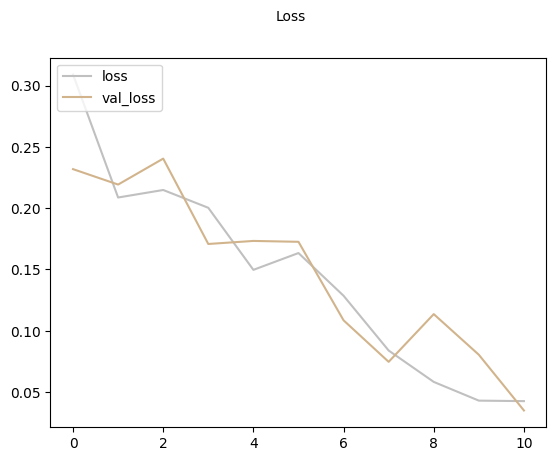

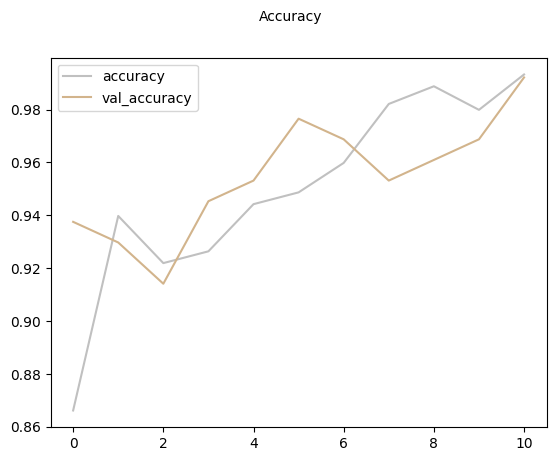

In [ ]:
# revise model performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='silver', label='loss')
plt.plot(hist.history['val_loss'], color='tan', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper left")
plt.show()


fig = plt.figure()
plt.plot(hist.history['accuracy'], color='silver', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='tan', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# test on new data

# Test the model: read the image that was not used in training
img = cv2.imread('test.jpeg')  # Load the image (BGR format)
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Change BGR to RGB and display
    plt.axis('off')  # Hide axis
    plt.show()

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    resize = tf.image.resize(img, (256, 256))  # Resize to (256, 256)
    plt.imshow(resize.numpy().astype(int))  # Display resized image
    plt.axis('off')  # Hide axis
    plt.show()

    # Expand dimensions to match model input shape
    expanded_img = np.expand_dims(resize, axis=0)  # Add batch dimension

    # Make a prediction
    test_prediction = model.predict(expanded_img / 255.0)  # Normalize and predict

    print(f'Prediction: {test_prediction[0][0]:.6f}')  # Print the prediction value

    # Decision based on prediction
    if test_prediction[0][0] > 0.5:
        print('Predicted class is Nicholas Cage')
    else:
        print('Predicted class is not Nicholas Cage')

Error: Could not load image. Check the file path.
